In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf



%matplotlib inline
plt.style.use('seaborn')
# pd.reset_option('all')


%cd C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


In [2]:
default = pd.read_excel('Default.xlsx')
# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
default['default2'] = default.default.factorize()[0]
default['student2'] = default.student.factorize()[0]
default.head()

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0
4,No,No,529.250605,35704.493935,0,0
5,No,No,785.655883,38463.495879,0,0


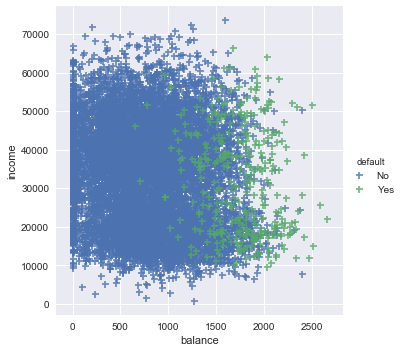

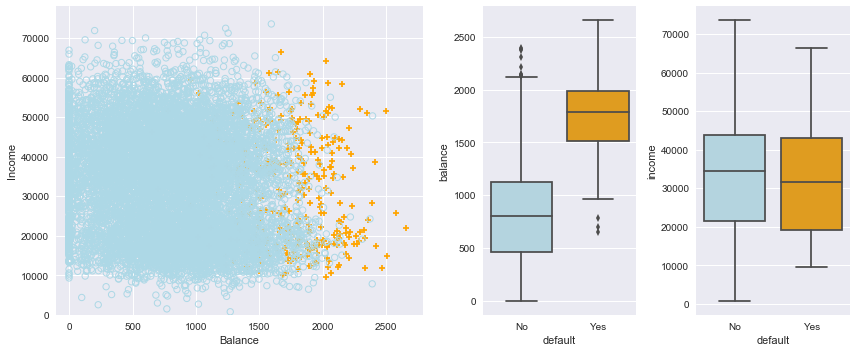

In [3]:
sns.lmplot(x='balance', y='income', hue='default', data=default, ci=None, fit_reg=False, markers='+')


fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# # Take a fraction of the samples where target value (default) is 'no'
# df_no = df[df.default2 == 0].sample(frac=0.15)
# # Take all samples  where target value is 'yes'
# df_yes = df[df.default2 == 1]
# df_ = df_no.append(df_yes)

ax1.scatter(default[default.default == 'Yes'].balance, default[default.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(default[default.default == 'No'].balance, default[default.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='none')

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=default, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=default, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

In [4]:
# my examples with stock data
import talib as ta
gspc = pd.read_csv('C:/Users/yo/Documents/ML_and_Python/ML_and_Python_courses_videos/Sentdex/Getting SP500 Data/stock_dfs/GSPC.csv', parse_dates=True, index_col="Date")
gspc.rename(columns={'Adj Close' :'Adj_Close'}, inplace=True)
gspc['pct_change'] = round(gspc['Adj_Close'].pct_change().dropna(), 3)
gspc['rsi16'] = ta.RSI(gspc.Adj_Close.values, timeperiod=16)
gspc['lr3_10'], gspc['lr3_10signal'], gspc['hist'] = ta.MACDEXT(gspc.Adj_Close.values, fastperiod=3, fastmatype=0, slowperiod=10, slowmatype=0, signalperiod=16, signalmatype=0)
gspc.dropna(inplace=True)
gspc.ix[gspc['pct_change'] >= 0, 'pct_change_ysn'] = 1
gspc.ix[gspc['pct_change'] < 0, 'pct_change_ysn'] = 0

gspc.tail(), gspc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16866 entries, 2017-11-01 to 1950-03-01
Data columns (total 12 columns):
Open              16866 non-null float64
High              16866 non-null float64
Low               16866 non-null float64
Close             16866 non-null float64
Volume            16866 non-null int64
Adj_Close         16866 non-null float64
pct_change        16866 non-null float64
rsi16             16866 non-null float64
lr3_10            16866 non-null float64
lr3_10signal      16866 non-null float64
hist              16866 non-null float64
pct_change_ysn    16866 non-null float64
dtypes: float64(11), int64(1)
memory usage: 1.7 MB


(             Open   High    Low  Close   Volume  Adj_Close  pct_change  \
 Date                                                                     
 1950-09-01  17.08  17.08  17.08  17.08  2520000      17.08       0.003   
 1950-06-01  16.98  16.98  16.98  16.98  2010000      16.98      -0.006   
 1950-05-01  16.93  16.93  16.93  16.93  2550000      16.93      -0.003   
 1950-04-01  16.85  16.85  16.85  16.85  1890000      16.85      -0.005   
 1950-03-01  16.66  16.66  16.66  16.66  1260000      16.66      -0.011   
 
                 rsi16    lr3_10  lr3_10signal      hist  pct_change_ysn  
 Date                                                                     
 1950-09-01  52.606159  0.183667     -0.073458  0.257125             1.0  
 1950-06-01  48.507339  0.139000     -0.055271  0.194271             0.0  
 1950-05-01  46.572047  0.099667     -0.037375  0.137041             0.0  
 1950-04-01  43.603084  0.023000     -0.021042  0.044041             0.0  
 1950-03-01  37.540330 

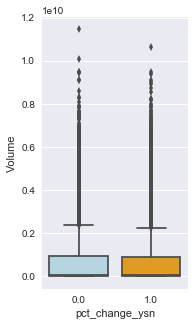

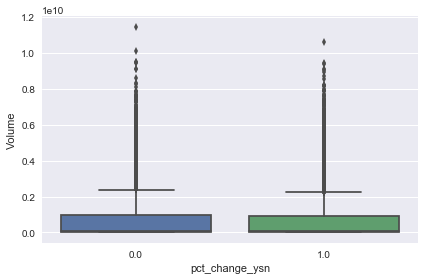

In [5]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax2 = plt.subplot(gs[0,-2])

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('pct_change_ysn', 'Volume', data=gspc, orient='v', ax=ax2, palette=c_palette)

# the same boxplot
sns.factorplot(kind='box',        # Boxplot
               y='Volume',       # Y-axis - values for boxplot
#                hue='Private',        # X-axis - first factor
               x='pct_change_ysn',         # Second factor denoted by color
               data=gspc,        # Dataframe 
               size=4,            # Figure size (x100px)      
               aspect=1.5,        # Width = size * aspect 
               legend_out=False)  # Make legend inside the plot

In [1]:
# Figure 4.2 Logistic Regression vs Linear regression
from sklearn.model_selection import train_test_split
X, y = default[['income','balance','student2']], default['default2']
X_train, X_test, y_train, y_test = train_test_split(X, y)


NameError: name 'default' is not defined

In [7]:
# Logistic Regression with statsmodel due to availability of summary()
logit = smf.logit(formula='default2 ~ income + balance + student2', data = default).fit()
print(logit.summary())
# logit.predict(pd.DataFrame({'intercept': 1,'balance': [40000]}))

# plt.scatter(X_train,y_train)
# plt.plot(X_test, prob[:,1], 'o', color='red')
# plt.plot(X_test, linreg.predict(X_test), color='black')
# plt.plot(X_test, predicted, 'o', color='green')



Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Feb 2017   Pseudo R-squ.:                  0.4619
Time:                        22:25:08   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000       -11.834    -9.904
income      3.033e-06    8.2

In [8]:
# code on how to use map()
#Default['default']=Default['default'].map({'No':0, 'Yes':1})
#Default['student']=Default['student'].map({'No':0, 'Yes':1})



In [4]:
import pandas_datareader.data as web
import datetime
import talib as ta


,Open,High,Low,Close,Volume,Adj_Close,pct_changee
Open,1.000000,0.999028,0.998794,0.998192,0.194270,0.643600,-0.010742
High,0.999028,1.000000,0.998274,0.999102,0.201341,0.634145,0.011102
Low,0.998794,0.998274,1.000000,0.998944,0.185723,0.654694,0.010264
Close,0.998192,0.999102,0.998944,1.000000,0.194471,0.643808,0.030561
Volume,0.194270,0.201341,0.185723,0.194471,1.000000,0.128984,-0.003441
Adj_Close,0.643600,0.634145,0.654694,0.643808,0.128984,1.000000,0.000936
pct_changee,-0.010742,0.011102,0.010264,0.030561,-0.003441,0.000936,1.000000


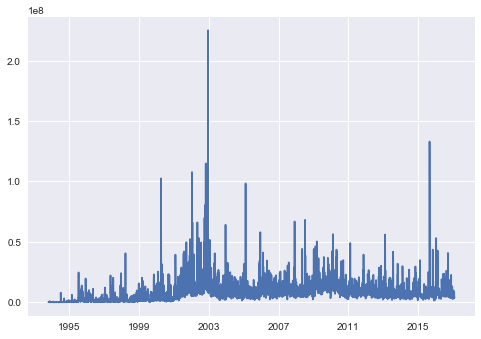

In [186]:
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime(2017, 1, 27)
atvi = web.DataReader("atvi", 'yahoo', start, end)
atvi.rename(columns={'Adj Close' :'Adj_Close'}, inplace=True)
atvi['pct_changee'] = atvi['Adj_Close'].pct_change().dropna()
plt.plot(atvi.Volume)
atvi.dropna()
atvi.corr()

In [226]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 2, 27)
gspc2 = web.DataReader("^GSPC", 'yahoo', start, end)
gspc2.rename(columns={'Adj Close' :'Adj_Close'}, inplace=True)
gspc2['pct_change'] = gspc2['Adj_Close'].pct_change()

gspc2['pct_change_lag1'] = gspc2['pct_change'].shift(1)


gspc2['pct_change_lag2'] = gspc2['Adj_Close'].pct_change(2)
gspc2['pct_change_lag3'] = gspc2['Adj_Close'].pct_change(3)
gspc2['pct_change_lag4'] = gspc2['Adj_Close'].pct_change(4)
gspc2['pct_change_lag5'] = gspc2['Adj_Close'].pct_change(5)
gspc2['pct_change_lag6'] = gspc2['Adj_Close'].pct_change(6)
gspc2['pct_change_lag7'] = gspc2['Adj_Close'].pct_change(7)
gspc2['pct_change_lag8'] = gspc2['Adj_Close'].pct_change(8)

gspc2['pct_change_lag2'] = gspc2['pct_change_lag2'].shift(1)
gspc2['pct_change_lag3'] = gspc2['pct_change_lag3'].shift(1)
gspc2['pct_change_lag4'] = gspc2['pct_change_lag4'].shift(1)
gspc2['pct_change_lag5'] = gspc2['pct_change_lag5'].shift(1)
gspc2['pct_change_lag6'] = gspc2['pct_change_lag6'].shift(1)
gspc2['pct_change_lag7'] = gspc2['pct_change_lag7'].shift(1)
gspc2['pct_change_lag8'] = gspc2['pct_change_lag8'].shift(1)


gspc2['day_lag1'] = gspc2['pct_change'].shift(1)
gspc2['day_lag2'] = gspc2['pct_change'].shift(2)
gspc2['day_lag3'] = gspc2['pct_change'].shift(3)
gspc2['day_lag4'] = gspc2['pct_change'].shift(4)
gspc2['day_lag5'] = gspc2['pct_change'].shift(5)
gspc2['day_lag6'] = gspc2['pct_change'].shift(6)
gspc2['day_lag7'] = gspc2['pct_change'].shift(7)
gspc2['day_lag8'] = gspc2['pct_change'].shift(8)
# gspc2['pct_change1'] = gspc2['Adj_Close'].shift(-1) / gspc2['Adj_Close']  - 1
# gspc2['pct_change2'] = gspc2['Adj_Close'].shift(-2) / gspc2['Adj_Close']  - 1
# gspc2['pct_change3'] = gspc2['Adj_Close'].shift(-3) / gspc2['Adj_Close']  - 1
# gspc2['pct_change4'] = gspc2['Adj_Close'].shift(-4) / gspc2['Adj_Close']  - 1
# gspc2['pct_change5'] = gspc2['Adj_Close'].shift(-5) / gspc2['Adj_Close']  - 1
# gspc2['pct_change6'] = gspc2['Adj_Close'].shift(-6) / gspc2['Adj_Close']  - 1
# gspc2['pct_change7'] = gspc2['Adj_Close'].shift(-7) / gspc2['Adj_Close']  - 1
# gspc2['pct_change8'] = gspc2['Adj_Close'].shift(-8) / gspc2['Adj_Close']  - 1

# gspc2 = gspc2.ix[(gspc2['pct_change'] > 0.0200)]
gspc2['lr3_10'], gspc2['lr3_10signal'], gspc2['hist'] = ta.MACDEXT(gspc2.Adj_Close.values, fastperiod=3, fastmatype=0, slowperiod=10, slowmatype=0, signalperiod=16, signalmatype=0)
gspc2['lr3_10_lag1'] = gspc2.lr3_10.shift(1)
gspc2['lr3_10_lag2'] = gspc2.lr3_10.shift(2)
gspc2['lr3_10_lag3'] = gspc2.lr3_10.shift(3)
gspc2['lr3_10_lag4'] = gspc2.lr3_10.shift(4)
gspc2['lr3_10_lag5'] = gspc2.lr3_10.shift(5)
gspc2['lr3_10signal_lag1'] = gspc2.lr3_10signal.shift(1)
gspc2['lr3_10signal_lag2'] = gspc2.lr3_10signal.shift(2)
gspc2['lr3_10signal_lag3'] = gspc2.lr3_10signal.shift(3)
gspc2['lr3_10signal_lag4'] = gspc2.lr3_10signal.shift(4)
gspc2['lr3_10signal_lag5'] = gspc2.lr3_10signal.shift(5)
gspc2['hist_lag1'] = gspc2['hist'].shift(1)
gspc2['hist_lag2'] = gspc2['hist'].shift(2)
gspc2['hist_lag3'] = gspc2['hist'].shift(3)
gspc2['hist_lag4'] = gspc2['hist'].shift(4)
gspc2['hist_lag5'] = gspc2['hist'].shift(5)
gspc2['rsi14'] = ta.RSI(gspc2.Adj_Close.values, timeperiod=14)
gspc2['rsi14_lag1'] = gspc2.rsi14.shift(1)
gspc2['rsi14_lag2'] = gspc2.rsi14.shift(2)
gspc2['rsi14_lag3'] = gspc2.rsi14.shift(3)
gspc2['rsi14_lag4'] = gspc2.rsi14.shift(4)
gspc2['rsi14_lag5'] = gspc2.rsi14.shift(5)
# gspc2['upperband'], gspc2['middleband'], gspc2['lowerband'] = ta.BBANDS(gspc2.Adj_Close.values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
# # BB crossed down and up categorical labels
# gspc2.ix[(gspc2['Adj_Close'] <= gspc2['lowerband']) , 'crossed_down'] = 1
# gspc2.ix[(gspc2['Adj_Close'] > gspc2['lowerband']) , 'crossed_down'] = 0
# gspc2.ix[(gspc2['Adj_Close'] >= gspc2['upperband']) , 'crossed_up'] = 1
# gspc2.ix[(gspc2['Adj_Close'] < gspc2['upperband']) , 'crossed_up'] = 0
gspc2['mama'], gspc2['fama'] = ta.MAMA(gspc2.Adj_Close.values, fastlimit=0.5, slowlimit=0.05)
gspc2['hilbert'] = ta.HT_TRENDLINE(gspc2.Adj_Close.values)
gspc2['atr'] = ta.ATR(gspc2.High.values, gspc2.Low.values, gspc2.Close.values, timeperiod=14)
gspc2.ix[gspc2['pct_change'] >= 0, 'direction'] = 1
gspc2.ix[gspc2['pct_change'] < 0, 'direction'] = 0
gspc2['direction_lag1'] = gspc2['direction'].shift(1)
gspc2['direction_lag2'] = gspc2['direction'].shift(2)
gspc2['direction_lag3'] = gspc2['direction'].shift(3)
gspc2['direction_lag4'] = gspc2['direction'].shift(4)
gspc2['direction_lag5'] = gspc2['direction'].shift(5)
gspc2['direction_lag6'] = gspc2['direction'].shift(6)
gspc2['direction_lag7'] = gspc2['direction'].shift(7)
gspc2['direction_lag8'] = gspc2['direction'].shift(8)

# gspc2.ix[gspc2['pct_change2'] >= 0, 'pct_change2_yn'] = 1
# gspc2.ix[gspc2['pct_change2'] < 0, 'pct_change2_yn'] = 0
# gspc2.ix[gspc2['pct_change3'] >= 0, 'pct_change3_yn'] = 1
# gspc2.ix[gspc2['pct_change3'] < 0, 'pct_change3_yn'] = 0
# gspc2.ix[gspc2['pct_change4'] >= 0, 'pct_change4_yn'] = 1
# gspc2.ix[gspc2['pct_change4'] < 0, 'pct_change4_yn'] = 0
# gspc2.ix[gspc2['pct_change5'] >= 0, 'pct_change5_yn'] = 1
# gspc2.ix[gspc2['pct_change5'] < 0, 'pct_change5_yn'] = 0
# gspc2.ix[gspc2['pct_change6'] >= 0, 'pct_change6_yn'] = 1
# gspc2.ix[gspc2['pct_change6'] < 0, 'pct_change6_yn'] = 0
# gspc2.ix[gspc2['pct_change7'] >= 0, 'pct_change7_yn'] = 1
# gspc2.ix[gspc2['pct_change7'] < 0, 'pct_change7_yn'] = 0

gspc2.head(20)
gspc2.dropna(axis=0,inplace=True)
# gspc2[pd.isnull(gspc2).any(axis=1)]

gspc2[['Adj_Close',
       'pct_change_lag2', 'pct_change_lag3', 'direction_lag1', 'direction_lag2',  'lr3_10', 'lr3_10_lag1', 'lr3_10_lag2', 'lr3_10_lag3', 'lr3_10signal', 'lr3_10signal_lag1', 'lr3_10signal_lag2', 'lr3_10signal_lag3', 'hist', 'hist_lag1', 'hist_lag2', 'hist_lag3',  'direction']].head(8)

,Adj_Close,pct_change_lag2,pct_change_lag3,direction_lag1,direction_lag2,lr3_10,lr3_10_lag1,lr3_10_lag2,lr3_10_lag3,lr3_10signal,lr3_10signal_lag1,lr3_10signal_lag2,lr3_10signal_lag3,hist,hist_lag1,hist_lag2,hist_lag3,direction
Date,,,,,,,,,,,,,,,,,,
2010-04-06,1189.439941,0.015401,0.012077,1.0,1.0,10.482300,6.175325,4.206010,3.806344,7.831501,8.094253,8.711815,9.503502,2.650799,-1.918928,-4.505805,-5.697158,1.0
2010-04-07,1182.449951,0.009626,0.017111,1.0,1.0,11.104301,10.482300,6.175325,4.206010,7.723041,7.831501,8.094253,8.711815,3.381260,2.650799,-1.918928,-4.505805,0.0
2010-04-08,1186.439941,-0.004202,0.003692,0.0,1.0,8.898970,11.104301,10.482300,6.175325,7.541851,7.723041,7.831501,8.094253,1.357119,3.381260,2.650799,-1.918928,1.0
2010-04-09,1194.369995,-0.002522,-0.000842,1.0,0.0,7.678320,8.898970,11.104301,10.482300,7.242829,7.541851,7.723041,7.831501,0.435491,1.357119,3.381260,2.650799,1.0
2010-04-12,1196.479980,0.010081,0.004145,1.0,1.0,9.365995,7.678320,8.898970,11.104301,6.997997,7.242829,7.541851,7.723041,2.367998,0.435491,1.357119,3.381260,1.0
2010-04-13,1197.300049,0.008462,0.011865,1.0,1.0,10.578023,9.365995,7.678320,8.898970,6.952248,6.997997,7.242829,7.541851,3.625775,2.367998,0.435491,1.357119,1.0
2010-04-14,1210.650024,0.002453,0.009154,1.0,1.0,12.266699,10.578023,9.365995,7.678320,7.191061,6.952248,6.997997,7.242829,5.075638,3.625775,2.367998,0.435491,1.0
2010-04-15,1211.670044,0.011843,0.013631,1.0,1.0,13.106055,12.266699,10.578023,9.365995,7.519333,7.191061,6.952248,6.997997,5.586722,5.075638,3.625775,2.367998,1.0


In [196]:
X, y = gspc2[['rsi14_lag1', 'rsi14_lag2', 'hilbert', 'atr']], gspc2['direction']
#'lr3_10', 'lr3_10signal', 'hist', 'rsi14', 'crossed_down', 'crossed_up', 
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = skl_lm.LogisticRegression()
clf.fit(X_test, y_test)
#clf.predict([[18.598649, -5.360959, 23.959609, 28.220342, 1.0, 0.0]]),
clf.score(X_test, y_test)
#21.012988,-4.956128, 25.969116,

0.53563305534495831

In [43]:
gspc2[['lr3_10', 'lr3_10_lag1',  'lr3_10_lag2', 'lr3_10_lag3', 'lr3_10signal', 'hist', 'lr3_10signal', \
       'rsi14', 'mama', 'fama', 'hilbert', 'atr']].tail(10)

,lr3_10,lr3_10_lag1,lr3_10_lag2,lr3_10_lag3,lr3_10signal,hist,lr3_10signal,rsi14,mama,fama,hilbert,atr
Date,,,,,,,,,,,,
2017-02-06,2.280673,0.680013,-2.892269,-1.159652,3.552552,-1.271880,3.552552,60.228773,2280.401712,2268.800510,2279.113221,14.379315
2017-02-07,5.056332,2.280673,0.680013,-2.892269,3.474345,1.581987,3.474345,60.447882,2286.740895,2273.285607,2280.355990,14.012220
2017-02-08,4.509684,5.056332,2.280673,0.680013,3.698391,0.811293,3.698391,61.152535,2287.137347,2273.631900,2281.597405,13.763492
2017-02-09,8.494019,4.509684,5.056332,2.280673,4.229125,4.264894,4.229125,66.490585,2288.173985,2273.995452,2283.259353,13.952540
2017-02-10,14.026343,8.494019,4.509684,5.056332,5.289628,8.736715,5.289628,69.321085,2302.137042,2281.030850,2285.373952,13.767349
2017-02-13,20.484692,14.026343,8.494019,4.509684,6.696961,13.787731,6.696961,72.953283,2303.442689,2281.591146,2288.261371,13.889679
2017-02-14,24.517017,20.484692,14.026343,8.494019,8.422064,16.094952,8.422064,75.365267,2305.149559,2282.180106,2291.715259,13.998285
2017-02-15,28.596989,24.517017,20.484692,14.026343,10.130726,18.466263,10.130726,78.007124,2327.199779,2293.435024,2296.390158,14.176264
2017-02-16,28.283325,28.596989,24.517017,20.484692,11.440222,16.843104,11.440222,76.470824,2337.209875,2304.378737,2300.635196,14.052241


In [201]:
logit_gspc2 = smf.logit(formula='direction ~ rsi14 + lr3_10_lag1', data = gspc2).fit()
print(logit_gspc2.summary())


Optimization terminated successfully.
         Current function value: 0.632021
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              direction   No. Observations:                10551
Model:                          Logit   Df Residuals:                    10548
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 Feb 2017   Pseudo R-squ.:                 0.08556
Time:                        14:01:50   Log-Likelihood:                -6668.5
converged:                       True   LL-Null:                       -7292.4
                                        LLR p-value:                1.030e-271
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -3.7666      0.121    -31.003      0.000        -4.005    -3.528
rsi14           0.0734    

# LDA - Linear Discriminant Analysis

In [24]:
X = default[['balance', 'income', 'student2']].as_matrix()
y = default.default2.as_matrix()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X_train, y_train).predict(X_test)


In [25]:
lda.score(X_train, y_train)
confusion_matrix(y_test, y_pred).T

array([[33, 34],
       [45, 66]])

In [26]:
print(classification_report(y_test, y_pred, target_names=['Yes', 'No']))

             precision    recall  f1-score   support

        Yes       0.49      0.42      0.46        78
         No       0.59      0.66      0.63       100

avg / total       0.55      0.56      0.55       178



# Chapter 4 - Lab - Smarket data

In [64]:
gspc2.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close', 'pct_change',
       'pct_change_lag2', 'pct_change_lag3', 'pct_change_lag4',
       'pct_change_lag5', 'pct_change_lag6', 'pct_change_lag7',
       'pct_change_lag8', 'day_lag1', 'day_lag2', 'day_lag3', 'day_lag4',
       'day_lag5', 'day_lag6', 'day_lag7', 'day_lag8', 'lr3_10',
       'lr3_10signal', 'hist', 'lr3_10_lag1', 'lr3_10_lag2', 'lr3_10_lag3',
       'lr3_10_lag4', 'lr3_10_lag5', 'lr3_10signal_lag1', 'lr3_10signal_lag2',
       'lr3_10signal_lag3', 'lr3_10signal_lag4', 'lr3_10signal_lag5',
       'hist_lag1', 'hist_lag2', 'hist_lag3', 'hist_lag4', 'hist_lag5',
       'rsi14', 'rsi14_lag1', 'rsi14_lag2', 'rsi14_lag3', 'rsi14_lag4',
       'rsi14_lag5', 'mama', 'fama', 'hilbert', 'atr', 'direction'],
      dtype='object')

# Data load for smarket, gspc3 and gspc4

In [2]:
smarket = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
smarket.head()
smarket['year'] = smarket.index.to_datetime().year

# creating a numerical value from a categorical values. I could use pd.factorize() but it assigned confusing values
# 0 for positive return and 1 for negative
smarket.ix[smarket['Today'] >= 0, 'Direction'] = 1
smarket.ix[smarket['Today'] < 0, 'Direction'] = 0
smarket['Direction'] = smarket['Direction'].astype(int)
smarket['Lag1**2'] = smarket.Lag1**2
smarket['Lag1**3'] = smarket.Lag1**3

# gspc3 has daily individual lags
gspc3 = gspc2[['day_lag1', 'day_lag2',
       'day_lag3', 'day_lag4', 'day_lag5','day_lag6', 'day_lag7', 'day_lag8', 'Volume', 'pct_change', 'direction']]
gspc3['year'] = gspc3.index.to_datetime().year

#gspc4 had cummulative lags comparig today with 1,2,3 etc days ago
gspc4 = gspc2[[ 'lr3_10', 'lr3_10_lag1','lr3_10_lag2','lr3_10_lag3',  'pct_change', 'pct_change_lag2', 'pct_change_lag3',
       'pct_change_lag4', 'pct_change_lag5', 'pct_change_lag6',
       'pct_change_lag7', 'pct_change_lag8','pct_change','direction', 'Volume' ]]
gspc4['year'] = gspc4.index.to_datetime().year

smarket.head()
gspc4.info()
gspc4.tail(8)

NameError: name 'gspc2' is not defined

In [289]:
# Logistic Regression with statsmodel due to availability of summary() for smarket
logit_smarket = smf.logit(formula='Direction ~ Lag1 +Lag2 + Lag3 + Lag4 + Lag5 + Volume', data = smarket).fit()
print(logit_smarket.summary())


Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Feb 2017   Pseudo R-squ.:                0.002074
Time:                        21:51:47   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601        -0.598     0.346
Lag1          -0.0731      0.

In [332]:
# Logistic Regression with sklearn for smarket
X_smarket = smarket[['Lag1', 'Lag2']]
y_smarket = smarket['Direction']

reg_smarket = skl_lm.LogisticRegression()
reg_smarket.fit(X_smarket, y_smarket)
print('Coefficients:',reg_smarket.coef_, '\nIntercept', reg_smarket.intercept_)
reg_smarket.predict_proba(X_smarket)[:10].flatten()
print('Custom Confusion Matrix:\n',pd.crosstab(y_smarket, reg_smarket.predict(X_smarket),\
                                        rownames=['True'], colnames=['Predicted'], margins=True))
print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_smarket, reg_smarket.predict(X_smarket)))
print('Classification Report:\n', classification_report(y_smarket, reg_smarket.predict(X_smarket)))
print('Accuracy Score:',accuracy_score(y_smarket, reg_smarket.predict(X_smarket)))
print('Precision Score:',precision_score(y_smarket, reg_smarket.predict(X_smarket)))
print('Standard sklearn .score():', reg_smarket.score(X_smarket, y_smarket))

Coefficients: [[-0.07132639 -0.04437839]] 
Intercept [ 0.07401017]
Custom Confusion Matrix:
 Predicted    0     1   All
True                      
0          114   488   602
1          102   546   648
All        216  1034  1250
Standard Confusion Matrix from sklearn:
 [[114 488]
 [102 546]]
Classification Report:
              precision    recall  f1-score   support

          0       0.53      0.19      0.28       602
          1       0.53      0.84      0.65       648

avg / total       0.53      0.53      0.47      1250

Accuracy Score: 0.528
Precision Score: 0.528046421663
Standard sklearn .score(): 0.528


In [4]:
# Logistic Regression on smarket data but with train vs test data separated by year
X_train2004 = smarket[:'2004'][['Lag1', 'Lag2']]
y_train2004 = smarket[:'2004']['Direction']
#, 'Lag3', 'Lag4', 'Lag5', 'Volume'
X_test2005 = smarket['2005 ':][['Lag1', 'Lag2']]
y_test2005 = smarket['2005':]['Direction']

reg_smarket = skl_lm.LogisticRegression()
reg_smarket.fit(X_train2004, y_train2004)
print(reg_smarket.coef_, reg_smarket.intercept_, reg_smarket.score(X_train2004, y_train2004), reg_smarket.score(X_test2005, y_test2005))

print('Confusion Matrix:\n',pd.crosstab(y_test2005, reg_smarket.predict(X_test2005),\
                                        rownames=['True'], colnames=['Predicted'], margins=True))
print(confusion_matrix(y_test2005, reg_smarket.predict(X_test2005)))
print(classification_report(y_test2005, reg_smarket.predict(X_test2005)))


[[-0.05546958 -0.04436457]] [ 0.03208806] 0.517034068136 0.559523809524
Confusion Matrix:
 Predicted   0    1  All
True                   
0          35   76  111
1          35  106  141
All        70  182  252
[[ 35  76]
 [ 35 106]]
             precision    recall  f1-score   support

          0       0.50      0.32      0.39       111
          1       0.58      0.75      0.66       141

avg / total       0.55      0.56      0.54       252



# Simulation with data set gspc3 - similar to the book but with real S&P500

In [822]:
# simulations for gspc3 with statsmodel

logit_gspc3 = smf.logit(formula='direction ~ day_lag1+ day_lag2 + day_lag3 + day_lag4 + day_lag5 + day_lag6 + day_lag7+ day_lag8+Volume', data = gspc3).fit()
print(logit_gspc3.summary())
logit_gspc3.predict()


Optimization terminated successfully.
         Current function value: 0.690401
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              direction   No. Observations:                10551
Model:                          Logit   Df Residuals:                    10541
Method:                           MLE   Df Model:                            9
Date:                Mon, 20 Feb 2017   Pseudo R-squ.:                0.001098
Time:                        00:26:12   Log-Likelihood:                -7284.4
converged:                       True   LL-Null:                       -7292.4
                                        LLR p-value:                   0.06662
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1342      0.025      5.354      0.000         0.085     0.183
day_lag1      -2.3990      1.

array([ 0.56298802,  0.53736038,  0.52389282, ...,  0.52933618,
        0.52799813,  0.52341176])

In [823]:
predictions = logit_gspc3.predict()
predictions[:10]
logit_gspc3.

array([ 0.56298802,  0.53736038,  0.52389282,  0.54493483,  0.5520052 ,
        0.53951322,  0.52233055,  0.53099274,  0.52220228,  0.5066258 ])

In [836]:
print(np.column_stack((gspc3.as_matrix(columns=["direction"]).flatten(), logit_gspc3.model.endog)))
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
print(confusion_matrix(gspc3['direction'], predictions_nominal))
print(classification_report(gspc3['direction'], predictions_nominal))
print(accuracy_score(gspc3['direction'], predictions_nominal))

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 ..., 
 [ 1.  1.]
 [ 0.  0.]
 [ 0.  0.]]
[[ 214 4729]
 [ 196 5412]]
             precision    recall  f1-score   support

        0.0       0.52      0.04      0.08      4943
        1.0       0.53      0.97      0.69      5608

avg / total       0.53      0.53      0.40     10551

0.533219600038


In [228]:
# simulations for gspc3 with sklearn
gspc3_feature_cols = ['day_lag1', 'day_lag2']

X_gspc3 = gspc2[gspc3_feature_cols]
y_gspc3 = gspc2['direction']

regit_gspc3 = skl_lm.LogisticRegression()
regit_gspc3.fit(X_gspc3, y_gspc3)
X_gspc3_train, X_gspc3_test, y_gspc3_train, y_gspc3_test = train_test_split(X_gspc3, y_gspc3)

print('Custom Confusion Matrix:\n',pd.crosstab(y_gspc3_test, regit_gspc3.predict(X_gspc3_test), rownames=['True'], colnames=['Predicted'], margins=True))

# print(confusion_matrix(y_gspc3, regit_gspc3.predict(X_gspc3)))

print('Intercept: ',regit_gspc3.intercept_)
for item1, item2 in zip(gspc3_feature_cols, regit_gspc3.coef_.flatten()):
    print('Coeff for:', item1, "...", item2)

# metrics
# print('Custom Confusion Matrix:\n',pd.crosstab(y_gspc3, regit_gspc3.predict(X_gspc3), rownames=['True'], colnames=['Predicted'], margins=True))
# print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_gspc3, regit_gspc3.predict(X_gspc3)))
# print('Classification Report:\n', classification_report(y_gspc3, regit_gspc3.predict(X_gspc3)))
# print('Accuracy Score:',accuracy_score(y_gspc3, regit_gspc3.predict(X_gspc3)))
# print('Precision Score:',precision_score(y_gspc3, regit_gspc3.predict(X_gspc3)))
# print('Standard sklearn .score():', regit_gspc3.score(X_gspc3, y_gspc3))

Custom Confusion Matrix:
 Predicted  1.0  All
True               
0.0        191  191
1.0        242  242
All        433  433
Intercept:  [ 0.16169318]
Coeff for: day_lag1 ... -0.276796863513
Coeff for: day_lag2 ... 0.157315388948


# Simulation with data set gspc4 

In [219]:
gspc4.columns

Index(['lr3_10_lag1', 'lr3_10_lag2', 'lr3_10_lag3', 'pct_change_lag2',
       'pct_change_lag3', 'pct_change_lag4', 'pct_change_lag5',
       'pct_change_lag6', 'pct_change_lag7', 'pct_change_lag8', 'pct_change',
       'direction', 'Volume', 'year'],
      dtype='object')

In [622]:
# simulations for gspc4 with statsmodel
logit_gspc4 = smf.logit(formula='direction ~ lr3_10_lag1+ lr3_10_lag2 +lr3_10_lag3+ pct_change_lag2 + pct_change_lag3 \
+ pct_change_lag4 + pct_change_lag5 + pct_change_lag6 + pct_change_lag7+ pct_change_lag8', data = gspc4).fit()
print(logit_gspc4.summary())

Optimization terminated successfully.
         Current function value: 0.219117
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              direction   No. Observations:                  711
Model:                          Logit   Df Residuals:                      700
Method:                           MLE   Df Model:                           10
Date:                Sun, 19 Feb 2017   Pseudo R-squ.:                  0.6836
Time:                        16:21:00   Log-Likelihood:                -155.79
converged:                       True   LL-Null:                       -492.31
                                        LLR p-value:                3.830e-138
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.0619      0.145      0.426      0.670        -0.223     0.347
lr3_10_lag1  

In [57]:
gspc2.head()

,Open,High,Low,Close,Volume,Adj_Close,pct_change,pct_change_lag1,pct_change_lag2,pct_change_lag3,...,atr,direction,direction_lag1,direction_lag2,direction_lag3,direction_lag4,direction_lag5,direction_lag6,direction_lag7,direction_lag8
Date,,,,,,,,,,,,,,,,,,,,,
1975-04-03,82.430000,82.839996,80.879997,81.510002,13920000,81.510002,-0.011161,-0.002541,-0.011156,-0.016935,...,2.035601,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1975-04-04,81.510002,81.900002,80.290001,80.879997,14170000,80.879997,-0.007729,-0.011161,-0.013674,-0.022193,...,2.005201,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1975-04-07,80.879997,81.110001,79.660004,80.349998,13860000,80.349998,-0.006553,-0.007729,-0.018804,-0.021297,...,1.965544,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1975-04-08,80.349998,81.650002,80.129997,80.989998,14320000,80.989998,0.007965,-0.006553,-0.014231,-0.025234,...,1.933720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1975-04-09,80.989998,83.220001,80.910004,82.839996,18120000,82.839996,0.022842,0.007965,0.001360,-0.006380,...,1.960596,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [229]:
# simulations for gspc4 with sklearn
gspc4_feature_cols = ['pct_change_lag1', 'pct_change_lag2']

# 'lr3_10_lag1', 'lr3_10_lag2', 'lr3_10_lag3', 'lr3_10signal_lag1', 'lr3_10signal_lag2',
#'lr3_10signal_lag3','pct_change_lag1', 'pct_change_lag2', 'pct_change_lag3'

# ['lr3_10_lag1', 'lr3_10_lag2', 'lr3_10_lag3', 'lr3_10_lag4', 'lr3_10_lag5', 'lr3_10signal_lag1',\
#                       'lr3_10signal_lag2', 'lr3_10signal_lag3','pct_change_lag2','pct_change_lag3','pct_change_lag4',\
#                       'pct_change_lag5','pct_change_lag6', 'pct_change_lag7', 'pct_change_lag8']

# for loop experiments
# for i in range(1, len(gspc4_feature_cols)):
#     X_gspc4 = gspc4[gspc4_feature_cols[i]].values.reshape(-1,1)
    
X_gspc4 = gspc2[gspc4_feature_cols]
y_gspc4 = gspc2['direction']
X_gspc4_train, X_gspc4_test, y_gspc4_train, y_gspc4_test = train_test_split(X_gspc4, y_gspc4)
regit_gspc4 = skl_lm.LogisticRegression()
regit_gspc4.fit(X_gspc4_train, y_gspc4_train)

print('Intercept: ',regit_gspc4.intercept_)
for item1, item2 in zip(gspc4_feature_cols, regit_gspc4.coef_.flatten()):
    print('Coeff for:', item1, "...", item2)
print('Training Score is:', regit_gspc4.score(X_gspc4_train, y_gspc4_train))
print('Test Score is:', regit_gspc4.score(X_gspc4_test, y_gspc4_test))

print('Custom Confusion Matrix:\n',pd.crosstab(y_gspc4_test, regit_gspc4.predict(X_gspc4_test), rownames=['True'], colnames=['Predicted'], margins=True))
print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_gspc4_test, regit_gspc4.predict(X_gspc4_test)))
print('Classification Report:\n', classification_report(y_gspc4_test, regit_gspc4.predict(X_gspc4_test)))
# regit_gspc4.predict([7.331396, 1.258398 ,1.258398 ,0.013897,0.01117  ,0.014574 ,0.010912,0.012695,0.009689])

Intercept:  [ 0.16780069]
Coeff for: pct_change_lag1 ... -0.200990391288
Coeff for: pct_change_lag2 ... 0.0111425062487
Training Score is: 0.541955350269
Test Score is: 0.535796766744
Custom Confusion Matrix:
 Predicted  1.0  All
True               
0.0        201  201
1.0        232  232
All        433  433
Standard Confusion Matrix from sklearn:
 [[  0 201]
 [  0 232]]
Classification Report:
              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       201
        1.0       0.54      1.00      0.70       232

avg / total       0.29      0.54      0.37       433



C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [674]:
pd.crosstab(y_smarket, reg_smarket.predict(X_smarket), rownames=['True'], colnames=['Predicted'], margins=True)



Predicted,0,1,All
True,,,
0,143,459,602
1,135,513,648
All,278,972,1250


# 4.6.3 Linear Discriminant Analysis - smarket


In [161]:
# LDA with sklearn for smarket

LDA_smarket = LinearDiscriminantAnalysis()
LDA_smarket.fit(X_train2004, y_train2004)

print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_test2005, LDA_smarket.predict(X_test2005)))
print('Classification Report:\n', classification_report(y_test2005, LDA_smarket.predict(X_test2005)))
print("Score :", LDA_smarket.score(X_test2005, y_test2005 ))
print("Group means:\n" ,LDA_smarket.means_) # means that on average when market is down, two previous days market tends to be up
print("Priors : ", LDA_smarket.priors_) # means that on average 49% market is down and 50% is up
print("Coeffs :", LDA_smarket.coef_)

Standard Confusion Matrix from sklearn:
 [[ 35  76]
 [ 35 106]]
Classification Report:
              precision    recall  f1-score   support

          0       0.50      0.32      0.39       111
          1       0.58      0.75      0.66       141

avg / total       0.55      0.56      0.54       252

Score : 0.559523809524
Group means:
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Priors :  [ 0.49198397  0.50801603]
Coeffs : [[-0.05544078 -0.0443452 ]]


# 4.6.4 Quadratic Discriminant Analysis - smarket

In [163]:
QDA_smarket = QuadraticDiscriminantAnalysis()

QDA_smarket.fit(X_train2004, y_train2004)

print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_test2005, QDA_smarket.predict(X_test2005)))
print('Classification Report:\n', classification_report(y_test2005, QDA_smarket.predict(X_test2005)))
print("Score :", QDA_smarket.score(X_test2005, y_test2005 ))
print("Group means:\n" ,QDA_smarket.means_) # means that on average when market is down, two previous days market tends to be up
print("Priors : ", QDA_smarket.priors_) # means that on average 49% market is down and 50% is up
# print("Coeffs :", QDA_smarket.coef_) - no coeffs in a Quadratic Function

Standard Confusion Matrix from sklearn:
 [[ 30  81]
 [ 20 121]]
Classification Report:
              precision    recall  f1-score   support

          0       0.60      0.27      0.37       111
          1       0.60      0.86      0.71       141

avg / total       0.60      0.60      0.56       252

Score : 0.599206349206
Group means:
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Priors :  [ 0.49198397  0.50801603]


In [213]:
X_gspc3_train.shape

(7924, 2)

In [230]:
QDA_gspc3 = QuadraticDiscriminantAnalysis()
QDA_gspc3.fit(X_gspc3_train, y_gspc3_train)
X_gspc3_test,y_gspc3_test

print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_gspc3_test, QDA_gspc3.predict(X_gspc3_test)))
print('Classification Report:\n', classification_report(y_gspc3_test, QDA_gspc3.predict(X_gspc3_test)))
print("Score :", QDA_gspc3.score(X_gspc3_test,y_gspc3_test))
print("Group means:\n" ,QDA_gspc3.means_) # means that on average when market is down, two previous days market tends to be up
print("Priors : ", QDA_gspc3.priors_) # means that on average 49% market is down and 50% is up

Standard Confusion Matrix from sklearn:
 [[ 19 172]
 [ 22 220]]
Classification Report:
              precision    recall  f1-score   support

        0.0       0.46      0.10      0.16       191
        1.0       0.56      0.91      0.69       242

avg / total       0.52      0.55      0.46       433

Score : 0.551963048499
Group means:
 [[ 0.0011449   0.00038325]
 [ 0.00030494  0.00056536]]
Priors :  [ 0.46574288  0.53425712]


In [231]:
QDA_gspc4 = QuadraticDiscriminantAnalysis()
QDA_gspc4.fit(X_gspc4_train, y_gspc4_train)

print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_gspc4_test, QDA_gspc4.predict(X_gspc4_test)))
print('Classification Report:\n', classification_report(y_gspc4_test, QDA_gspc4.predict(X_gspc4_test)))
print("Score :", QDA_gspc4.score(X_gspc4_test,y_gspc4_test))
print("Group means:\n" ,QDA_gspc4.means_) # means that on average when market is down, two previous days market tends to be up
print("Priors : ", QDA_gspc4.priors_) # means that on average 49% market is down and 50% is up

Standard Confusion Matrix from sklearn:
 [[ 13 188]
 [ 18 214]]
Classification Report:
              precision    recall  f1-score   support

        0.0       0.42      0.06      0.11       201
        1.0       0.53      0.92      0.68       232

avg / total       0.48      0.52      0.41       433

Score : 0.524249422633
Group means:
 [[ 0.00092711  0.00112555]
 [ 0.00028724  0.00114702]]
Priors :  [ 0.45804465  0.54195535]


In [10]:
KNN_smarket = neighbors.KNeighborsClassifier(n_neighbors=3)
KNN_smarket.fit(X_train2004, y_train2004)

print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_test2005, KNN_smarket.predict(X_test2005)))
print('Classification Report:\n', classification_report(y_test2005, KNN_smarket.predict(X_test2005)))
print("Score :", KNN_smarket.score(X_test2005, y_test2005 ))
# print("Group means:\n" ,KNN_smarket.means_) # means that on average when market is down, two previous days market tends to be up
# print("Priors : ", KNN_smarket.priors_) # means that on average 49% market is down and 50% is up
# print("Coeffs :", QDA_smarket.coef_) - no coeffs in a Quadratic Function

Standard Confusion Matrix from sklearn:
 [[48 63]
 [55 86]]
Classification Report:
              precision    recall  f1-score   support

          0       0.47      0.43      0.45       111
          1       0.58      0.61      0.59       141

avg / total       0.53      0.53      0.53       252

Score : 0.531746031746


In [225]:
KNN_gspc3 = neighbors.KNeighborsClassifier(n_neighbors=5)
KNN_gspc3.fit(X_gspc3_train, y_gspc3_train)


print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_gspc3_test, KNN_gspc3.predict(X_gspc3_test)))
print('Classification Report:\n', classification_report(y_gspc3_test, KNN_gspc3.predict(X_gspc3_test)))
print("Score :", KNN_gspc3.score(X_gspc3_test,y_gspc3_test))
# print("Group means:\n" ,KNN_gspc3.means_) # means that on average when market is down, two previous days market tends to be up
# print("Priors : ", KNN_gspc3.priors_) # means that on average 49% market is down and 50% is up

Standard Confusion Matrix from sklearn:
 [[526 720]
 [599 797]]
Classification Report:
              precision    recall  f1-score   support

        0.0       0.47      0.42      0.44      1246
        1.0       0.53      0.57      0.55      1396

avg / total       0.50      0.50      0.50      2642

Score : 0.500757002271


In [233]:
KNN_gspc4 = neighbors.KNeighborsClassifier(n_neighbors=5)
KNN_gspc4.fit(X_gspc4_train, y_gspc4_train)


print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_gspc4_test, KNN_gspc4.predict(X_gspc4_test)))
print('Classification Report:\n', classification_report(y_gspc4_test, KNN_gspc4.predict(X_gspc4_test)))
print("Score :", KNN_gspc4.score(X_gspc4_test,y_gspc4_test))
# print("Group means:\n" ,KNN_gspc4.means_) # means that on average when market is down, two previous days market tends to be up
# print("Priors : ", KNN_gspc4.priors_) # means that on average 49% market is down and 50% is up

Standard Confusion Matrix from sklearn:
 [[ 74 127]
 [ 76 156]]
Classification Report:
              precision    recall  f1-score   support

        0.0       0.49      0.37      0.42       201
        1.0       0.55      0.67      0.61       232

avg / total       0.52      0.53      0.52       433

Score : 0.531177829099


# 4.6.6 = KNN - Caravan data

In [256]:
caravan = pd.read_csv('caravan.csv', index_col=0)
caravan.head()
X = caravan.drop('Purchase', axis=1).astype('float64')
y = caravan.Purchase
X_scaled = preprocessing.scale(X)

X_train = X_scaled[1000:,:]
y_train = y[1000:]
X_test = X_scaled[:1000,:]
y_test = y[:1000]

def KNN(n_neighbors=1, weights='uniform'):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    return(pred, score, clf.classes_)

def plot_confusion_matrix(cm, classes, n_neighbors, title='Confusion matrix (Normalized)',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix: KNN-{}'.format(n_neighbors))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('True label',rotation='horizontal', ha='right')
    plt.ylabel('Predicted label')
    plt.show()


(5822, 86)

In [282]:
weekly = pd.read_csv('weekly.csv', index_col=0, parse_dates=True)
weekly.ix[weekly['Today'] >= 0, 'Direction'] = 1
weekly.ix[weekly['Today'] < 0, 'Direction'] = 0
weekly['Direction'] = weekly['Direction'].astype(int)
weekly.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
1990-01-01,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1990-01-01,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
1990-01-01,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
1990-01-01,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
1990-01-01,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


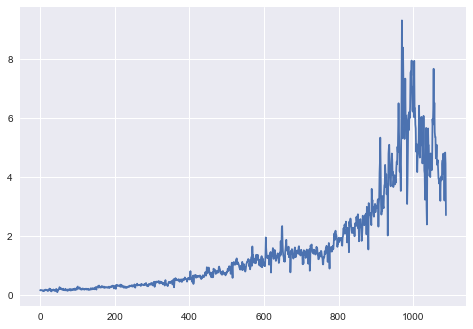

In [263]:
plt.plot(weekly.Volume)

In [275]:
# simulations for weekly with statsmodel
logit_weekly = smf.logit(formula='Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data = weekly).fit()
print(logit_weekly.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Feb 2017   Pseudo R-squ.:                0.006580
Time:                        20:43:15   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002         0.098     0.435
Lag1          -0.0413      0.

In [280]:
log_sl_learn_weekly = skl_lm.LogisticRegression()

X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly.Direction
log_sl_learn_weekly.fit(X, y)
y_pred = log_sl_learn_weekly.predict(X)
print(' Score is:', log_sl_learn_weekly.score(X, y))
print("Coeff :", log_sl_learn_weekly.coef_)
print('Custom Confusion Matrix:\n',pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y, y_pred))
print('Classification Report:\n', classification_report(y, y_pred))

 Score is: 0.56290174472
Coeff : [[-0.04117292  0.05846974 -0.01599122 -0.02769998 -0.01440289 -0.02212844]]
Custom Confusion Matrix:
 Predicted    0    1   All
True                     
0           55  429   484
1           47  558   605
All        102  987  1089
Standard Confusion Matrix from sklearn:
 [[ 55 429]
 [ 47 558]]
Classification Report:
              precision    recall  f1-score   support

          0       0.54      0.11      0.19       484
          1       0.57      0.92      0.70       605

avg / total       0.55      0.56      0.47      1089



In [ ]:
log_sl_learn_weekly = skl_lm.LogisticRegression()

X_train = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_train = weekly.Direction
log_sl_learn_weekly.fit(X, y)
y_pred = log_sl_learn_weekly.predict(X)
print(' Score is:', log_sl_learn_weekly.score(X, y))
print("Coeff :", log_sl_learn_weekly.coef_)
print('Custom Confusion Matrix:\n',pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y, y_pred))
print('Classification Report:\n', classification_report(y, y_pred))

In [285]:
X_train = weekly['1990':'2008'][['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X_test = weekly['2009':][['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_train = weekly['1990':'2008']['Direction']
y_test = weekly['2009':]['Direction']

log_sl_learn_weekly.fit(X_train, y_train)
y_pred = log_sl_learn_weekly.predict(X_test)
print(' Score is:', log_sl_learn_weekly.score(X_test, y_test))
print("Coeff :", log_sl_learn_weekly.coef_)
print('Custom Confusion Matrix:\n',pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# X_train2004 = smarket[:'2004'][['Lag1', 'Lag2']]

 Score is: 0.461538461538
Coeff : [[-0.06209774  0.04481868 -0.01530652 -0.03091964 -0.03756508 -0.0882247 ]]
Custom Confusion Matrix:
 Predicted   0   1  All
True                  
0          31  12   43
1          44  17   61
All        75  29  104
Standard Confusion Matrix from sklearn:
 [[31 12]
 [44 17]]
Classification Report:
              precision    recall  f1-score   support

          0       0.41      0.72      0.53        43
          1       0.59      0.28      0.38        61

avg / total       0.51      0.46      0.44       104



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_, y) X_